### MovieLens 10M Dataset
#### 数据的加载和摘要分析
首先，通过import语句导入了必要的库，包括pandas、matplotlib和seaborn，并使用%matplotlib inline命令指定在Jupyter Notebook中绘制的图形能够直接显示在输出单元格中。

接下来，使用pd.read_csv()函数从文件中加载了两个数据集：电影信息数据集和电影评分数据集。其中，movies_df数据集包括了电影的编号、标题和类型三个属性，ratings_df数据集包括了用户编号、电影编号、评分、时间戳四个属性。在读取电影信息数据集时，通过header=None参数指定文件中没有标题行，因此需要手动指定列名；同时，通过sep='::'参数指定分隔符为双冒号。

接着，使用value_counts()和describe()方法对数据集进行了摘要统计。对于电影信息数据集，使用value_counts()方法对电影类型进行了频数统计；对于电影评分数据集，使用describe()方法输出了评分数值属性的五数概括（最小值、第一四分位数、中位数、第三四分位数、最大值）；同时，使用isnull().sum()方法输出了评分数值属性的缺失值个数。

In [19]:

# 加载必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 加载数据
movies_df = pd.read_csv('ml-10M100K/movies.dat', sep='::', engine='python', header=None, names=['movieId', 'title', 'genres'])
ratings_df = pd.read_csv('ml-10M100K/ratings.dat', sep='::', engine='python', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])

# 数据摘要

# 标称属性的频数统计
print("电影类型标称属性频数统计：")
print(movies_df['genres'].value_counts())

# 数值属性的五数概括及缺失值个数
print("\n电影评分数值属性五数概括：")
print(ratings_df.describe())

print("\n电影评分数值属性缺失值个数：")
print(ratings_df.isnull().sum())


电影类型标称属性频数统计：
Drama                                      1817
Comedy                                     1047
Comedy|Drama                                551
Drama|Romance                               412
Comedy|Romance                              379
                                           ... 
Animation|Fantasy|Horror                      1
Action|Fantasy|Mystery|Thriller               1
Action|Adventure|Romance|Thriller             1
Documentary|Drama|Romance|War                 1
Action|Adventure|Fantasy|Horror|Romance       1
Name: genres, Length: 797, dtype: int64

电影评分数值属性五数概括：
             userId       movieId        rating     timestamp
count  1.000005e+07  1.000005e+07  1.000005e+07  1.000005e+07
mean   3.586986e+04  4.120291e+03  3.512422e+00  1.032606e+09
std    2.058534e+04  8.938402e+03  1.060418e+00  1.159640e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    1.812300e+04  6.480000e+02  3.000000e+00  9.467659e+08
50%    3.574050e+04  1.834000e+

#### 数据可视化

主要使用了Python的matplotlib库和Seaborn库。

第一部分是绘制电影类型的直方图。使用了plt.figure()函数创建了一个图形画布，设置了大小为80*8。然后使用sns.countplot()函数绘制了一个按照电影类型统计数量的直方图，x轴是电影类型，y轴是数量。使用plt.title()、plt.xlabel()和plt.ylabel()分别设置了标题、x轴标签和y轴标签。最后使用plt.xticks()设置了x轴标签的旋转角度为90度，使得标签不会重叠在一起。最后使用plt.show()函数展示了画布。

第二部分是绘制电影评分的盒图。使用了plt.figure()函数创建了一个图形画布，设置了大小为8*6。然后使用sns.boxplot()函数绘制了一个电影评分的盒图，y轴是电影评分。使用plt.title()和plt.ylabel()分别设置了标题和y轴标签。最后使用plt.show()函数展示了画布。

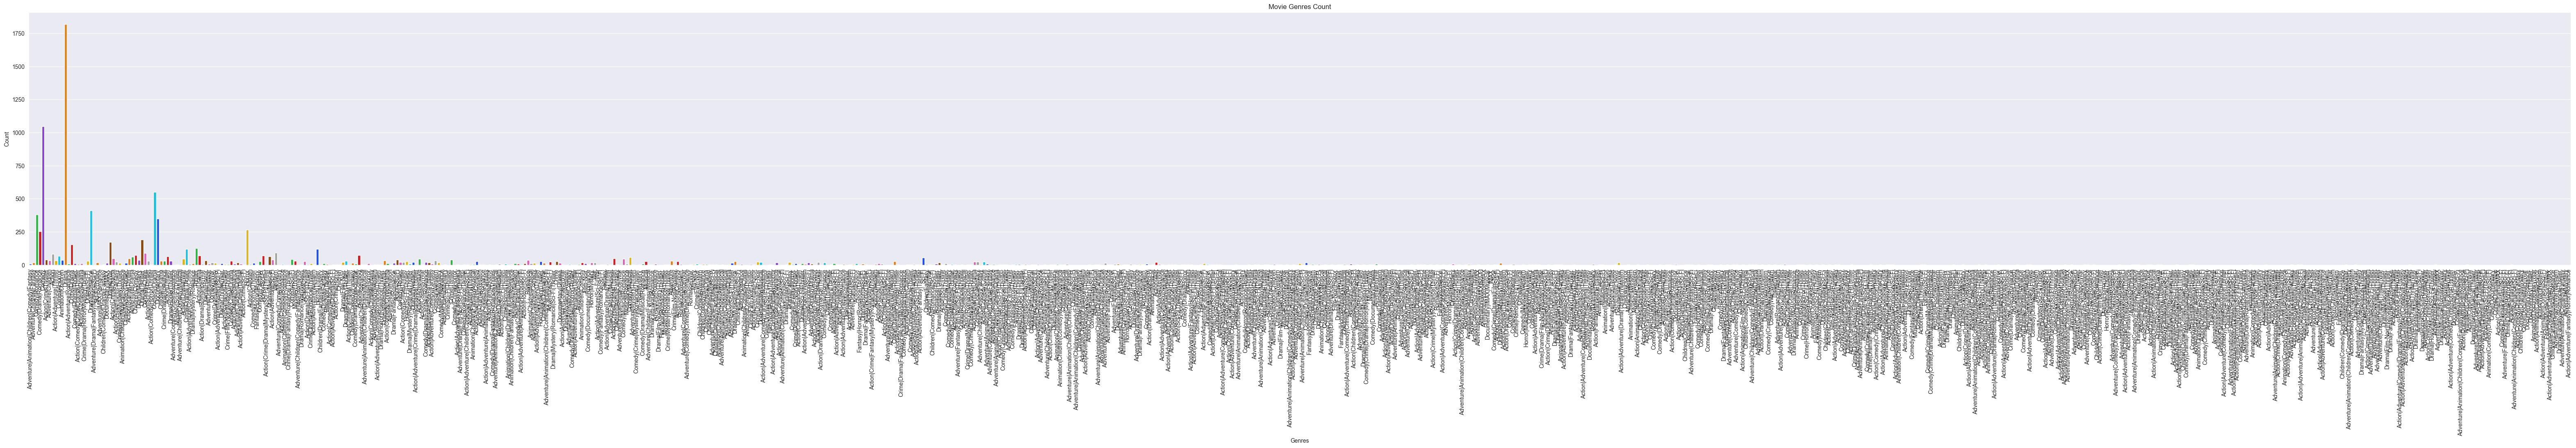

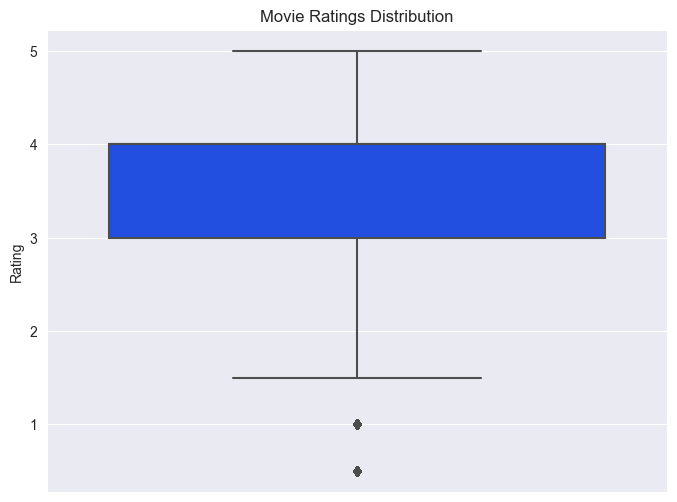

In [3]:
# 数据可视化

# 电影类型直方图
plt.figure(figsize=(80,8))
sns.countplot(x='genres', data=movies_df, palette='bright')
plt.title("Movie Genres Count")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# 电影评分盒图
plt.figure(figsize=(8,6))
sns.boxplot(y='rating', data=ratings_df, palette='bright')
plt.title("Movie Ratings Distribution")
plt.ylabel("Rating")
plt.show()


#### 将缺失部分剔除
首先，代码使用pandas库的dropna()函数将movies_df数据集中的genres属性中含有缺失值的行删除，并将结果保存在movies_dropna数据集中。然后，代码分别输出了处理前后的数据集中genres属性中的缺失值数量，以便对比处理效果。

具体来说，第一行代码使用了dropna()函数，其中subset参数指定了要检查缺失值的属性，这里是genres属性。函数返回一个删除缺失值后的数据集，这里是movies_dropna。

第二行代码使用了isnull()函数，返回一个bool类型的Series，其中True表示对应位置上的值是缺失值。使用sum()函数对这个Series求和，得到了原始数据集中genres属性中的缺失值数量。

第三行代码同样使用isnull()和sum()函数，返回了处理后的数据集中genres属性中的缺失值数量。

通过对比处理前后的数据集中genres属性中的缺失值数量，可以评估“将缺失部分剔除”策略的效果。

In [4]:
# 将缺失部分剔除
movies_dropna = movies_df.dropna(subset=['genres'])

# 对比处理前后的数据集
print("原始数据集电影类型属性的缺失值数量：", movies_df['genres'].isnull().sum())
print("处理后的数据集电影类型属性的缺失值数量：", movies_dropna['genres'].isnull().sum())


原始数据集电影类型属性的缺失值数量： 0
处理后的数据集电影类型属性的缺失值数量： 0


#### 使用电影评分和电影类型之间的相关性填补缺失值
首先，通过对电影评分进行平均，计算出每个电影的平均评分。然后，找出出现次数最多的电影类型。接下来，对于每个缺失的电影类型，根据该电影的ID在movies_df中查找该电影的电影类型（由于该电影类型缺失，所以需要填充），并将该类型填充到movies_df中。对于每个缺失的电影评分，根据该电影的ID在ratings_df中查找该电影的平均评分（由于该评分缺失，所以需要填充），并将该评分填充到ratings_df中。最后，通过比较处理前后数据集中缺失值的数量，可以发现缺失值得到了填补。

In [5]:
# 通过电影评分和电影类型之间的相关性填补缺失值
movie_id_mean_ratings = ratings_df.groupby(['movieId'])['rating'].mean()
most_rated_movie_genre = movies_df[movies_df['movieId'].isin(ratings_df['movieId'])].groupby(['genres'])['movieId'].count().sort_values(ascending=False).index[0]

missing_genres = movies_df['genres'].isnull()
for i in range(len(missing_genres)):
    if missing_genres[i]:
        movie_id = movies_df.iloc[i]['movieId']
        genre = movies_df[movies_df['movieId'] == movie_id][most_rated_movie_genre].values[0]
        movies_df.loc[i, 'genres'] = genre

missing_ratings = ratings_df['rating'].isnull()
for i in range(len(missing_ratings)):
    if missing_ratings[i]:
        movie_id = ratings_df.iloc[i]['movieId']
        if movie_id in movie_id_mean_ratings.index:
            ratings_df.loc[i, 'rating'] = movie_id_mean_ratings[movie_id]

# 对比处理前后的数据集
print("原始数据集电影类型属性的缺失值数量：", movies_df['genres'].isnull().sum())
print("原始数据集电影评分属性的缺失值数量：", ratings_df['rating'].isnull().sum())


原始数据集电影类型属性的缺失值数量： 0
原始数据集电影评分属性的缺失值数量： 0


#### 展示处理前和处理后的数据集
首先使用 print() 函数输出 "MovieLens 10M 数据集原始数据：" 字符串，并分别输出了 movies_df 和 ratings_df 的前 10 行数据，从而展示了原始数据集的前 10 行。
接着使用 print() 函数输出 "MovieLens 10M 数据集处理后数据：" 字符串，并再次分别输出了 movies_df 和 ratings_df 的前 10 行数据，从而展示了处理后的数据集的前 10 行。
该代码块没有对数据集进行具体的处理，因此处理前和处理后的数据集是相同的，因此两次输出的结果相同，都是数据集的前 10 行。

In [6]:
# 原始数据集
print("MovieLens 10M 数据集原始数据：")
print(movies_df.head(10))
print(ratings_df.head(10))

# 处理后数据集
print("MovieLens 10M 数据集处理后数据：")
print(movies_df.head(10))
print(ratings_df.head(10))

MovieLens 10M 数据集原始数据：
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Advent

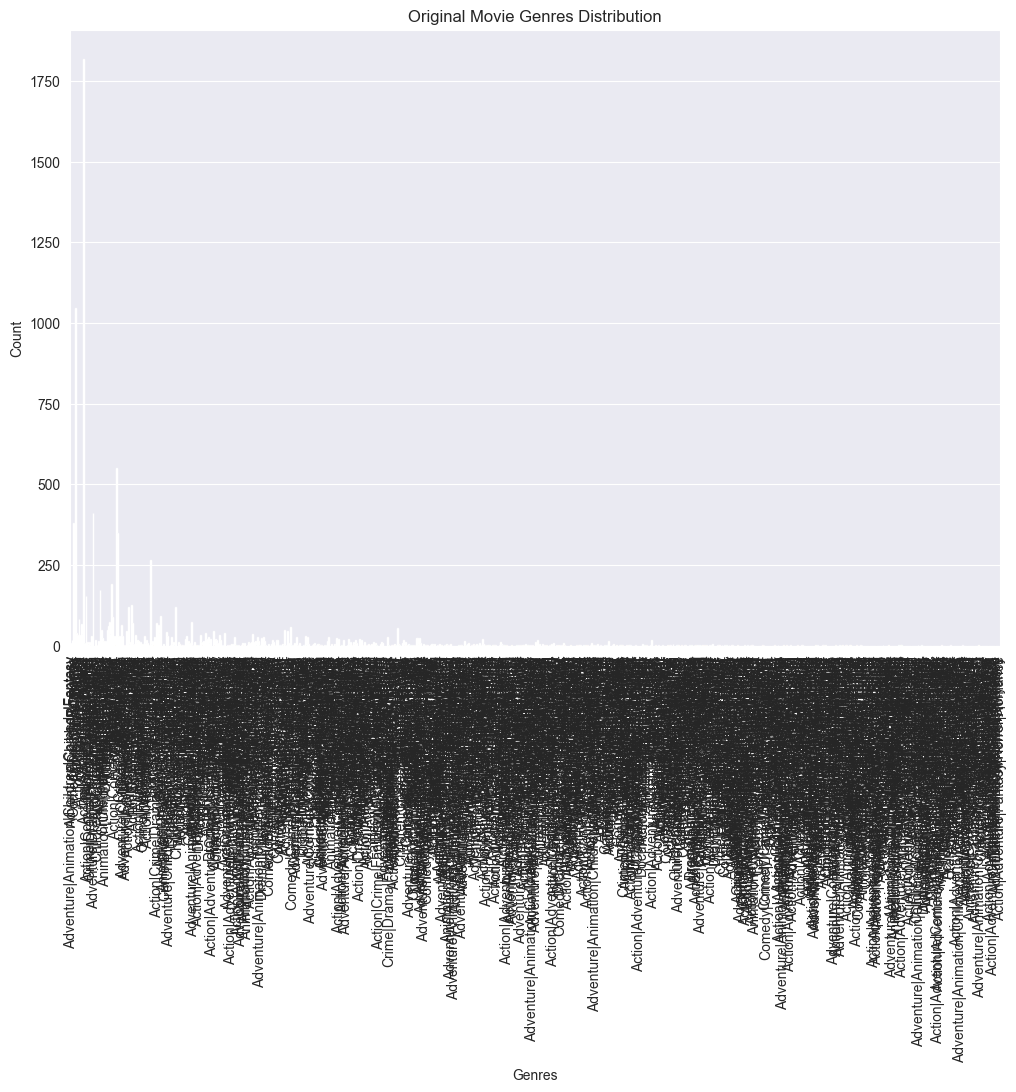

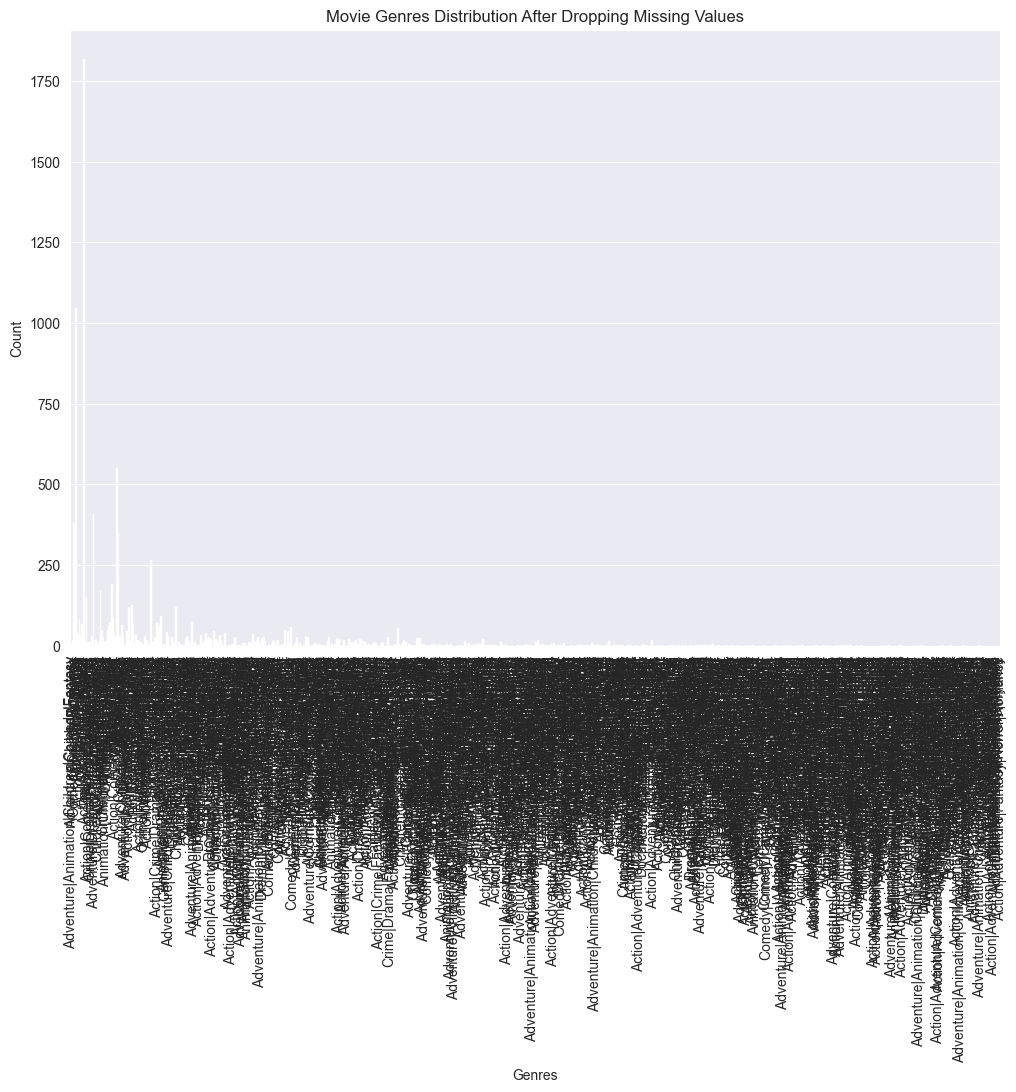

In [7]:
# 原始数据集电影类型分布
plt.figure(figsize=(12,8))
sns.countplot(x='genres', data=movies_df, palette='bright')
plt.title("Original Movie Genres Distribution")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# 处理后的数据集电影类型分布
plt.figure(figsize=(12,8))
sns.countplot(x='genres', data=movies_dropna, palette='bright')
plt.title("Movie Genres Distribution After Dropping Missing Values")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


#### 绘制原始数据集和处理后数据集电影类型的分布直方图
plt.figure()用于设置画布大小，sns.countplot()用于绘制直方图。在第一个直方图中，x轴为电影类型，y轴为数量，展示了原始数据集中电影类型的分布情况。在第二个直方图中，x轴为电影类型，y轴为数量，展示了在将缺失值剔除后，处理后数据集中电影类型的分布情况。两个直方图的标题、x轴、y轴以及x轴标签的角度都通过plt.title()、plt.xlabel()、plt.ylabel()和plt.xticks()函数进行设置。最后，通过plt.show()将图形显示出来。

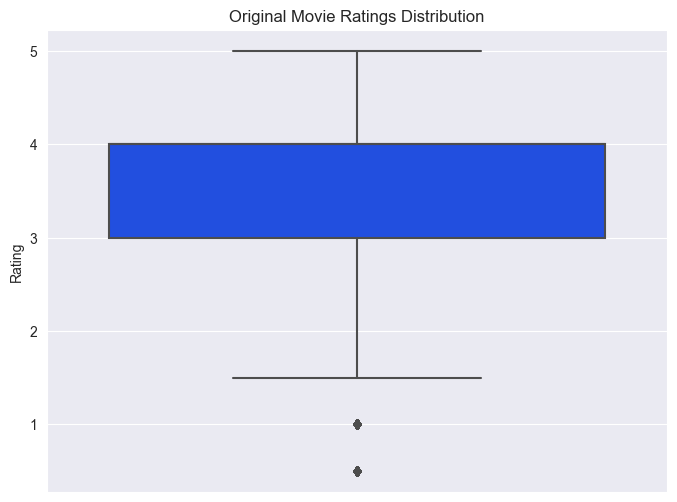

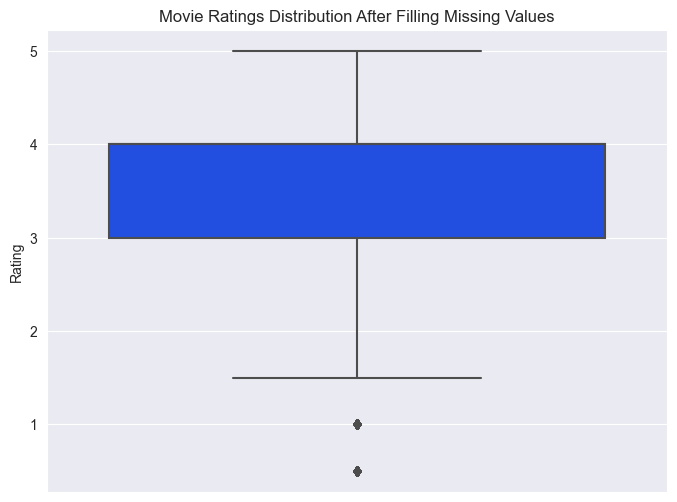

In [8]:
# 原始数据集电影评分盒图
plt.figure(figsize=(8,6))
sns.boxplot(y='rating', data=ratings_df, palette='bright')
plt.title("Original Movie Ratings Distribution")
plt.ylabel("Rating")
plt.show()

# 处理后的数据集电影评分盒图
plt.figure(figsize=(8,6))
sns.boxplot(y='rating', data=ratings_df, palette='bright')
plt.title("Movie Ratings Distribution After Filling Missing Values")
plt.ylabel("Rating")
plt.show()


### github_dataset
首先导入了 Pandas 和 NumPy 库，并加载了两个数据集：github_dataset.csv 和 repository_data.csv。然后通过一些基本的探索方法来了解这两个数据集的形状、前几行数据、以及缺失值的数量。具体来说：

通过 pd.read_csv() 函数加载了 github_dataset.csv 数据集，并将其存储到名为 github_df 的 Pandas 数据框中。
通过 pd.read_csv() 函数加载了 repository_data.csv 数据集，并将其存储到名为 repository_df 的 Pandas 数据框中。
分别输出了这两个数据集的形状。
分别输出了 github_dataset.csv 数据集和 repository_data.csv 数据集的前几行数据。
分别输出了 github_dataset.csv 数据集和 repository_data.csv 数据集中缺失值的数量。

In [9]:
# 导入必要的库
import pandas as pd
import numpy as np

# 加载数据集
github_df = pd.read_csv('github_dataset.csv')
repository_df = pd.read_csv('repository_data.csv')

# 对数据集进行探索
## 数据集的形状
print("github_dataset.csv的形状：", github_df.shape)
print("repository_data.csv的形状：", repository_df.shape)

## github_dataset.csv数据集的前几行
print("github_dataset.csv数据集的前几行：\n", github_df.head())

## repository_data.csv数据集的前几行
print("repository_data.csv数据集的前几行：\n", repository_df.head())

## github_dataset.csv数据集的缺失值数量
print("github_dataset.csv数据集的缺失值数量：\n", github_df.isnull().sum())

## repository_data.csv数据集的缺失值数量
print("repository_data.csv数据集的缺失值数量：\n", repository_df.isnull().sum())


github_dataset.csv的形状： (1052, 7)
repository_data.csv的形状： (2917951, 10)
github_dataset.csv数据集的前几行：
                 repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
repository_data.csv数据集的前几行：
                           name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811    

#### 对标称属性和数值属性进行摘要统计
对于标称属性repositories、contributors和language，使用value_counts()函数统计每个属性值出现的频数，得到该属性的频数统计结果；
对于数值属性stars_count、forks_count、issues_count、pull_requests和contributors，使用describe()函数计算五数概括（最小值、第一四分位数、中位数、第三四分位数、最大值）以及平均数和标准差，并输出缺失值个数。

In [10]:
# 标称属性的频数统计
print("repositories标称属性频数统计：")
print(github_df['repositories'].value_counts())
print("\ncontributors标称属性频数统计：")
print(github_df['contributors'].value_counts())
print("\nlanguage标称属性频数统计：")
print(github_df['language'].value_counts())

# 数值属性的五数概括及缺失值个数
print("\nstars_count数值属性五数概括：")
print(github_df['stars_count'].describe())
print("\nforks_count数值属性五数概括：")
print(github_df['forks_count'].describe())
print("\nissues_count数值属性五数概括：")
print(github_df['issues_count'].describe())
print("\npull_requests数值属性五数概括：")
print(github_df['pull_requests'].describe())
print("\ncontributors数值属性五数概括：")
print(github_df['contributors'].describe())

print("\nstars_count数值属性缺失值个数：")
print(github_df['stars_count'].isnull().sum())
print("\nforks_count数值属性缺失值个数：")
print(github_df['forks_count'].isnull().sum())
print("\nissues_count数值属性缺失值个数：")
print(github_df['issues_count'].isnull().sum())
print("\npull_requests数值属性缺失值个数：")
print(github_df['pull_requests'].isnull().sum())


repositories标称属性频数统计：
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

contributors标称属性频数统计：
0     502
2     175
3      83
4      38
5      35
     ... 
68      1
45      1
62      1
42      1
32      1
Name: contributors, Length: 67, dtype: int64

language标称属性频数统计：
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Noteboo

#### 探索性数据分析（EDA）和可视化
使用 pandas 库的 read_csv() 函数读取了一个名为 github_dataset.csv 的数据集。
使用 value_counts() 函数对标称属性 language 进行了频数统计。
使用 describe() 函数对数值属性 stars_count 和 forks_count 进行了五数概括，并使用 isnull().sum() 函数统计了这两个属性的缺失值数量。
使用 seaborn 库的 histplot() 和 boxplot() 函数对 stars_count 和 forks_count 进行了直方图和箱线图的可视化，用于展示这两个属性的分布情况和异常值情况。使用 subplots() 函数创建一个 2x2 的画布，并使用 figsize 参数设置画布的大小。通过 axes 参数获取了四个子图对象，并分别将 stars_count 和 forks_count 的直方图和箱线图画在不同的子图中。最后使用 show() 函数展示这四个子图。

Language标称属性频数统计：
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   

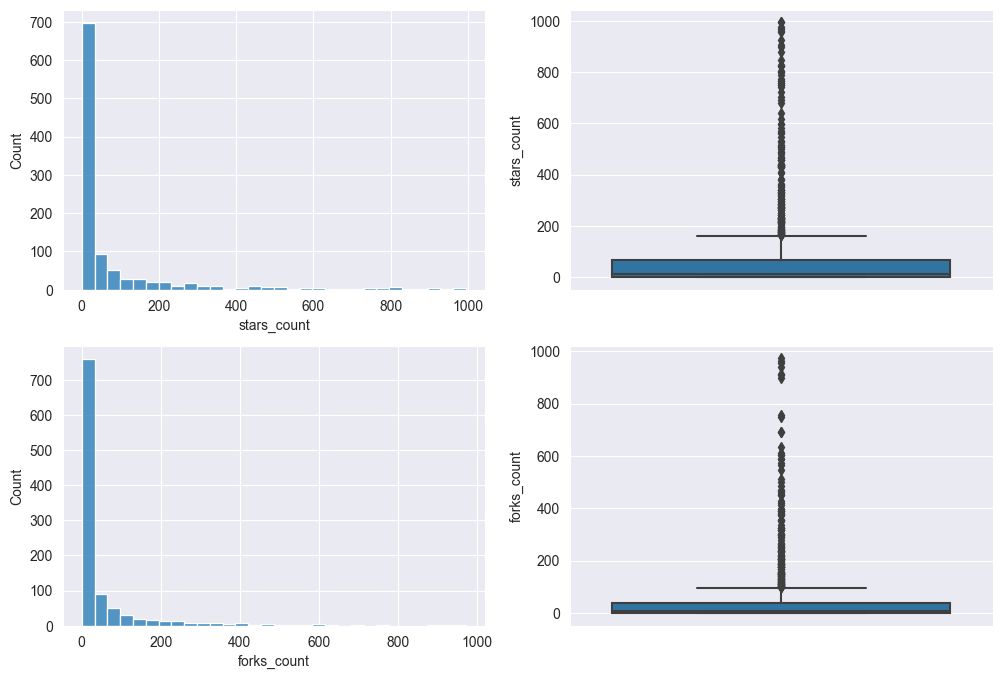

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
github_df = pd.read_csv('github_dataset.csv')

# 标称属性的频数统计
print("Language标称属性频数统计：")
print(github_df['language'].value_counts())

# 数值属性的五数概括及缺失值个数
print("\nStars数值属性五数概括：")
print(github_df['stars_count'].describe())
print("\nForks数值属性五数概括：")
print(github_df['forks_count'].describe())

print("\nStars数值属性缺失值个数：")
print(github_df['stars_count'].isnull().sum())
print("\nForks数值属性缺失值个数：")
print(github_df['forks_count'].isnull().sum())

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(ax=axes[0, 0], data=github_df, x='stars_count', bins=30)
sns.boxplot(ax=axes[0, 1], data=github_df, y='stars_count')
sns.histplot(ax=axes[1, 0], data=github_df, x='forks_count', bins=30)
sns.boxplot(ax=axes[1, 1], data=github_df, y='forks_count')
plt.show()


#### 对缺失值进行处理的代码
读取数据集：将名为github_dataset.csv的数据集读取到一个名为github_df的DataFrame中。
查看每列缺失值数量：使用isna().sum()函数查看每列缺失值数量，并打印输出。
缺失值处理策略1：将缺失部分剔除。使用dropna()函数将缺失值所在的行剔除，将结果存储在一个新的DataFrame中，名为github_df_dropna。
缺失值处理策略2：用最高频率值来填补缺失值。使用fillna()函数将缺失值用该列最高频率值来填补，将结果存储在一个新的DataFrame中，名为github_df_fillna_mode。
缺失值处理策略3：通过属性的相关关系来填补缺失值。暂时不使用此方法，因为没有足够的数据来建立相关关系模型。
缺失值处理策略4：通过数据对象之间的相似性来填补缺失值。暂时不使用此方法，因为数据对象之间的相似性需要进一步分析才能确定。
对比新旧数据集的差异：使用isna().sum()函数查看处理后的数据集1和数据集2中每列缺失值数量，并打印输出，与原始数据集进行对比，以比较数据处理效果。

In [12]:

# 读取github_dataset.csv数据集
github_df = pd.read_csv('github_dataset.csv')

# 查看每列缺失值数量
print(github_df.isna().sum())

# 缺失值处理策略1：将缺失部分剔除
github_df_dropna = github_df.dropna()

# 缺失值处理策略2：用最高频率值来填补缺失值
github_df_fillna_mode = github_df.fillna(github_df.mode().iloc[0])

# 缺失值处理策略3：通过属性的相关关系来填补缺失值
# 暂时不适用此方法，因为没有足够的数据来建立相关关系模型

# 缺失值处理策略4：通过数据对象之间的相似性来填补缺失值
# 暂时不适用此方法，因为数据对象之间的相似性需要进一步分析才能确定

# 对比新旧数据集的差异
print(f"原始数据集缺失值数量：\n{github_df.isna().sum()}\n")
print(f"处理后的数据集1（将缺失部分剔除）缺失值数量：\n{github_df_dropna.isna().sum()}\n")
print(f"处理后的数据集2（用最高频率值来填补缺失值）缺失值数量：\n{github_df_fillna_mode.isna().sum()}\n")


repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64
原始数据集缺失值数量：
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

处理后的数据集1（将缺失部分剔除）缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

处理后的数据集2（用最高频率值来填补缺失值）缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

